In [11]:
import pandas as pd
import glob

# get data file names

figure_meta = {
    'key_path': 'log_dir/csvs/updateloss', # updateloss, testreward, LR
    'y_df_label': 'update/loss',
    'x_df_label': 'Steps',
    'y_display_label': 'loss',
    'x_display_label': 'number of samples trained',
    'run_names': ['run_20220326T203643', 'run_20220326T210803', 'run_20220326T234839'],
    'line_names': ['run_20220326T203643', 'run_20220326T210803', 'run_20220326T234839'],
    'plot_filename': 'loss_largeBatches'
}

path = figure_meta['key_path']
filenames = figure_meta['run_names']
filepaths = [path + "/" + filename + ".csv" for filename in filenames]
y_df_label = figure_meta['y_df_label']
x_df_label = figure_meta['x_df_label']
y_display_label = figure_meta['y_display_label']
x_display_label = figure_meta['x_display_label']
plot_names = figure_meta['line_names']
#title = 'LR comparison for DQN Agent'

plot_dfs = []
for filepath in filepaths:
    df = pd.read_csv(filepath, sep=';')
    df[y_df_label] = df[y_df_label]
    plot_dfs.append(df)

FileNotFoundError: [Errno 2] No such file or directory: 'log_dir/csvs/updateloss/run_20220326T203643.csv'

In [7]:
# https://plotly.com/python/plot-data-from-csv/
# https://stackoverflow.com/questions/64500472/plot-multiple-pandas-dataframes-in-one-graph-python-plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.kaleido.scope.mathjax = None # https://github.com/plotly/plotly.py/issues/3469

fig = go.Figure()
for name, df in zip(plot_names, plot_dfs):
    fig = fig.add_trace(go.Scatter(x = df[x_df_label],
                                   y = df[y_df_label], 
                                   name = name))
    
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=70,
        r=70,
        b=30,
        t=30,
        pad=4
    ),
    yaxis=dict(
        title_text=y_display_label,
        #ticktext=["Very long label", "long label", "3", "label"],
        #tickvals=[1, 2, 3, 4],
        #tickmode="array",
        #titlefont=dict(size=30),
    ),
    xaxis=dict(
        title_text=x_display_label,
        #range=(0, 7000000),
        #ticktext=["Very long label", "long label", "3", "label"],
        #tickvals=[1, 2, 3, 4],
        #tickmode="array",
        #titlefont=dict(size=30),
    ),
    title=dict(
        #text=title,
    ),
    paper_bgcolor="LightSteelBlue",
)
# https://plotly.com/python/horizontal-vertical-shapes/
#fig.add_hline(y=3.84, line_dash="dot", annotation_text="optimal", annotation_position="bottom right")
fig.update_yaxes(rangemode="tozero")
fig.show()
fig.write_image("figures/" + figure_meta['plot_filename'] + ".pdf")

import json
with open("figure_metas/" + figure_meta['plot_filename'] + ".json", "w") as fp:
    json.dump(figure_meta,fp)
    

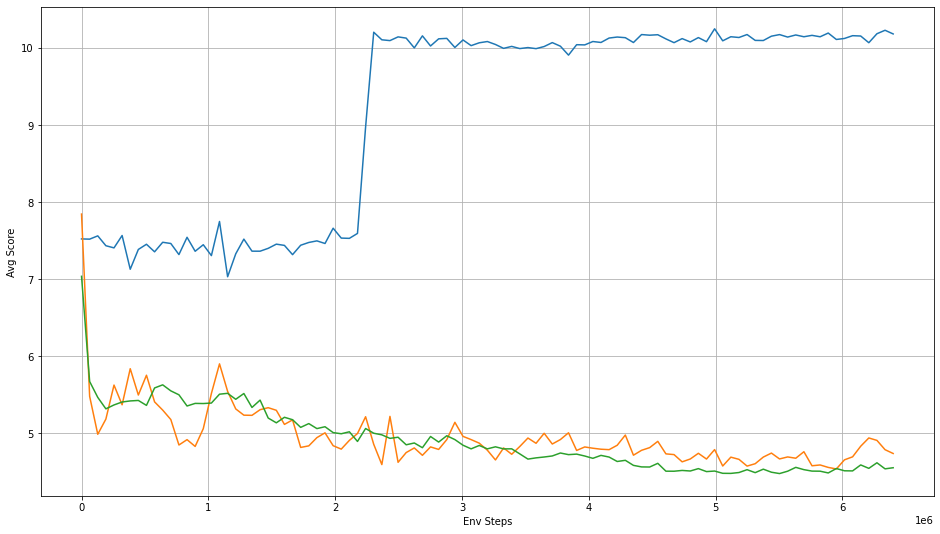

In [24]:
import matplotlib.pyplot as plt
import numpy as np
x_name = 'Steps'
y_name = 'test/reward'
fig, ax = plt.subplots()
plt.plot(df1[x_name], df1[y_name])
plt.plot(df2[x_name], df2[y_name])
plt.plot(df3[x_name], df3[y_name])

ax.set(xlabel='Env Steps', ylabel='Avg Score')
#ax.set_ylim(ymin=0)
ax.grid()

fig.set_size_inches(16, 9)
#fig.savefig("test.png")
plt.show()

In [ ]:
# !pip install -U kaleido